In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, gs

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
grid_oversample = pipeline_params['grid_oversample']
exposure_time = pipeline_params['exposure_time']
suppress_output = pipeline_params['suppress_output']
final_pixel_side = pipeline_params['final_pixel_side']
side = pipeline_params['side']
num_pix = pipeline_params['num_pix']

band = 'F184'

print(f'grid_oversample: {grid_oversample}')
print(f'side: {side}')
print(f'final_pixel_side: {final_pixel_side}')
print(f'num_pix: {num_pix}')

grid_oversample: 3
side: 10.56
final_pixel_side: 90
num_pix: 96


In [3]:
lens = SampleStrongLens()

# add CDM subhalos; NB same subhalo population for all
lens.add_subhalos(*pyhalo.unpickle_subhalos(os.path.join(pickle_dir, 'pyhalo', 'cdm_subhalos_tuple')))

array = lens.get_array(num_pix=num_pix * grid_oversample, side=side, band=band)

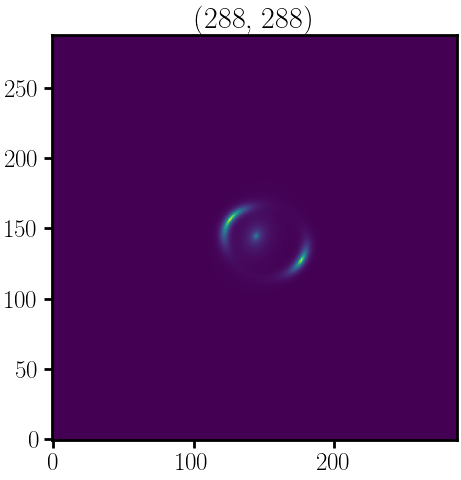

In [4]:
plt.imshow(array)
plt.title(array.shape)
plt.show()

In [5]:
gs_images, execution_time = gs.get_images(lens, array, band, input_size=num_pix, output_size=final_pixel_side,
                                          grid_oversample=grid_oversample)

print(f'Generated {len(gs_images)} image(s) in {execution_time}')

Generated 1 image(s) in 0:00:10


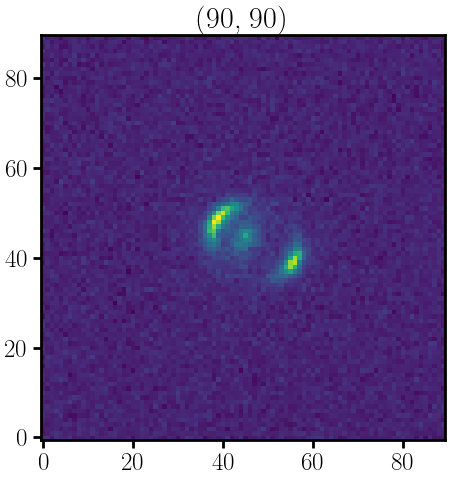

In [6]:
plt.imshow(gs_images[0])
plt.title(gs_images[0].shape)
plt.show()